In [14]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd

Text(0.5, 1.0, 'Dataset')

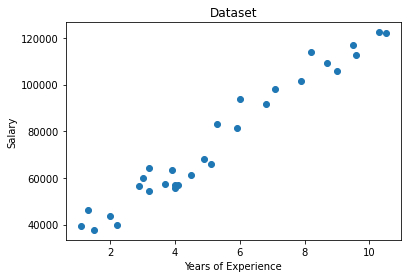

In [15]:
df = pd.read_csv("data.csv")
df = pd.DataFrame(df)
x = df['YearsExperience'].to_numpy()
y = df['Salary'].to_numpy()
plt.scatter(x,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Dataset')

In [16]:
#Hyperparameters
learning_rate = 0.0001
intial_b = 0
intial_m = 0
num_iter = 90000

In [17]:
#Cost funtion
def compute_cost(b,m,x,y):
    total_cost = 0
    N = float(len(x))
    s = len(x)
    
    #
    for i in range(0,s):
        p = x[i]
        q = y[i]
        total_cost += (q-(m*p+b))**2
        
    return total_cost/N

In [18]:
def gradient_runner(x,y,starting_b,starting_m,learning_rate,num_iter):
    b = starting_b
    m = starting_m
    cost_graph = []
    
    #iterations start
    for i in range(num_iter):
        cost_graph.append(compute_cost(b,m,x,y))
        b,m = step_gradient(b,m,x,y,learning_rate)
        
    return [b,m,cost_graph]

def step_gradient(b,m,x,y,learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(x))
    s = len(x)
    
    #find gradients
    for i in range(0,s):
        p = x[i]
        q = y[i]
        m_gradient += -(2/N)*p*(q-(m*p+b))
        b_gradient += -(2/N)*(q-(m*p+b))
        
    #update
    m_updated = m - learning_rate*m_gradient
    b_updated = b -learning_rate*b_gradient
    
    return b_updated,m_updated

In [19]:
b,m,cost_graph = gradient_runner(x,y,intial_b,intial_m,learning_rate,num_iter)

#print
print('Optimised  b: ',b)
print('Optimised m: ',m)

print('cost: ',compute_cost(b,m,x,y))

Optimised  b:  25792.200198623526
Optimised m:  9449.962321461866
cost:  31270951.72228096


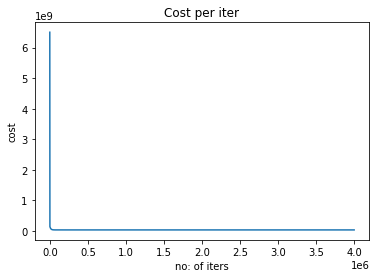

In [20]:
plt.plot(cost_graph)
plt.xlabel('no: of iters')
plt.ylabel('cost')
plt.title('Cost per iter')
plt.show()

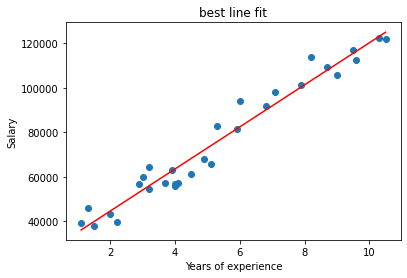

In [22]:
plt.scatter(x,y)
pred = m*x+b
plt.plot(x,pred,c='r')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('best line fit')
plt.show()